<div class="alert alert-block alert-success">
    
 
# Berkeley- PCMLAI: OH 3- Introduction to Data Analysis
    
 👨‍🏫 **Vikesh K**      
 #️⃣ **OH-3**  
 💼**[Car Price Analysis](https://docs.google.com/document/d/1zfLcBHbXo9OOoFh91uA46tjk_exWjw9LDcYlyV4YCi4/edit#heading=h.o29fbd83peof)**
    
     

</div>

 💡  <span style='font-family:Georgia'>
    <font color= darkred> ***All progress takes place outside the comfort zone- Michael Bobak***
    </font> 💡   

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

## Loading data 

**Please run the below code to ensure that you are able to load the data**

In [18]:
url = 'https://raw.githubusercontent.com/vkoul/data/main/misc/vehicles_us.csv'

df = pd.read_csv(url, parse_dates = ["date_posted"])

In [55]:
orig_df = df.copy()

In [19]:
df.sample(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
6013,21979,2014.0,chevrolet silverado 1500,excellent,8.0,gas,87960.0,automatic,pickup,silver,NaN,2019-03-07,8
34221,200,2017.0,hyundai elantra,excellent,4.0,gas,77000.0,automatic,sedan,red,NaN,2018-05-06,44
14996,9995,2014.0,toyota corolla,like new,4.0,gas,101610.0,automatic,sedan,silver,NaN,2018-12-11,23
3781,12500,NaN,ford f150,good,8.0,gas,120000.0,automatic,pickup,grey,1.0,2018-10-15,18
5881,4500,2005.0,chevrolet silverado,good,8.0,gas,200000.0,automatic,truck,white,NaN,2019-03-27,27
37098,14500,2012.0,ford explorer,excellent,6.0,gas,91407.0,automatic,SUV,black,1.0,2018-07-11,86
41263,11995,2013.0,ford edge,excellent,6.0,gas,112000.0,automatic,SUV,brown,1.0,2019-01-03,22
10887,19700,2017.0,chevrolet camaro lt coupe 2d,good,6.0,gas,35807.0,other,coupe,black,NaN,2018-12-07,31
23305,5500,2007.0,ford mustang,excellent,6.0,gas,72000.0,automatic,coupe,red,NaN,2019-03-15,6
28932,3200,1993.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,white,1.0,2018-07-06,13


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    47906 non-null  float64       
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   cylinders     46265 non-null  float64       
 5   fuel          51525 non-null  object        
 6   odometer      43633 non-null  float64       
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   42258 non-null  object        
 10  is_4wd        25572 non-null  float64       
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(2), object(6)
memory usage: 5.1+ MB


## Data Quality checks

**Missing values**

In [21]:
df.isna().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

In [25]:
df.isna().mean().round(2).multiply(100)

price            0.0
model_year       7.0
model            0.0
condition        0.0
cylinders       10.0
fuel             0.0
odometer        15.0
transmission     0.0
type             0.0
paint_color     18.0
is_4wd          50.0
date_posted      0.0
days_listed      0.0
dtype: float64

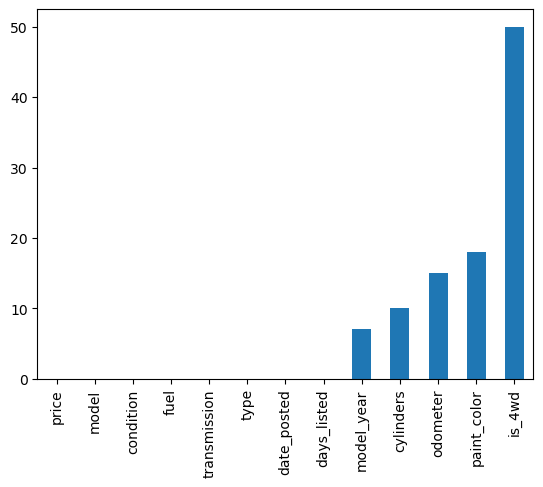

In [33]:
df.isna().mean().round(2).multiply(100).sort_values().plot(kind = "bar");

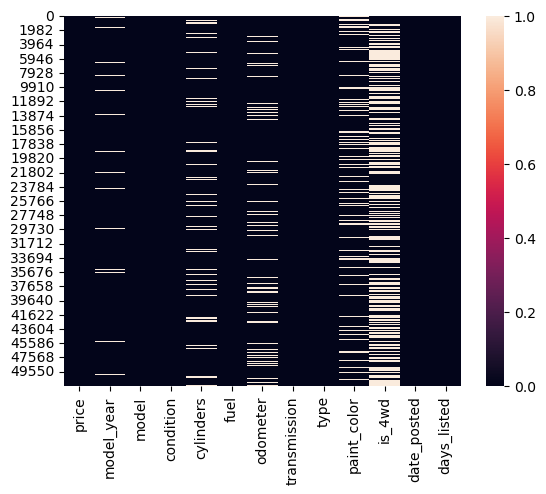

In [30]:
sns.heatmap(df.isna());

In [36]:
df["is_4wd"] = df["is_4wd"].fillna(0)

In [37]:
df.isna().sum()

price              0
model_year      3619
model              0
condition          0
cylinders       5260
fuel               0
odometer        7892
transmission       0
type               0
paint_color     9267
is_4wd             0
date_posted        0
days_listed        0
dtype: int64

**Duplicates**

In [38]:
df.duplicated().sum()

0

**Outliers**

### EDA 

**Univariate Relationship**

In [40]:
df.describe().round(0)

,price,model_year,cylinders,odometer,is_4wd,date_posted,days_listed
count,51525.0,47906.0,46265.0,43633.0,51525.0,51525,51525.0
mean,12132.0,2010.0,6.0,115553.0,0.0,2018-10-25 01:57:46.270742528,40.0
min,1.0,1908.0,3.0,0.0,0.0,2018-05-01 00:00:00,0.0
25%,5000.0,2006.0,4.0,70000.0,0.0,2018-07-29 00:00:00,19.0
50%,9000.0,2011.0,6.0,113000.0,0.0,2018-10-25 00:00:00,33.0
75%,16839.0,2014.0,8.0,155000.0,1.0,2019-01-21 00:00:00,53.0
max,375000.0,2019.0,12.0,990000.0,1.0,2019-04-19 00:00:00,271.0
std,10041.0,6.0,2.0,65095.0,0.0,NaN,28.0


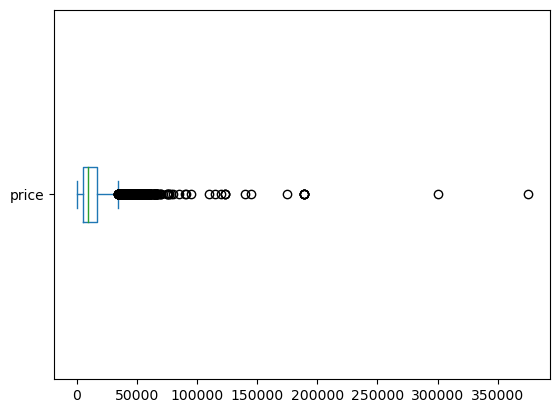

In [44]:
df["price"].plot(kind = "box", vert = False);

In [61]:
df.describe([0.05, 0.01, 0.85,0.90, 0.95, 0.99]).round(0)

,price,model_year,cylinders,odometer,is_4wd,date_posted,days_listed
count,48459.0,45059.0,43527.0,41038.0,48459.0,48459,48459.0
mean,12283.0,2010.0,6.0,116094.0,0.0,2018-10-24 21:37:34.318083328,40.0
min,1950.0,1908.0,3.0,0.0,0.0,2018-05-01 00:00:00,0.0
1%,2200.0,1991.0,4.0,131.0,0.0,2018-05-04 00:00:00,3.0
5%,2990.0,2000.0,4.0,18537.0,0.0,2018-05-18 00:00:00,7.0
50%,9850.0,2011.0,6.0,113419.0,0.0,2018-10-24 00:00:00,33.0
85%,21900.0,2016.0,8.0,178000.0,1.0,2019-02-26 00:00:00,67.0
90%,24999.0,2016.0,8.0,194000.0,1.0,2019-03-16 00:00:00,77.0
95%,29900.0,2017.0,8.0,220000.0,1.0,2019-04-02 00:00:00,94.0
99%,38499.0,2018.0,8.0,284000.0,1.0,2019-04-16 00:00:00,132.0


* **Z-score**
* **IQR method**

In [52]:
df.shape

(51525, 13)

In [58]:
df = df.query("price >= 1950").query("price <= 44000").copy()

In [56]:
51525 - 48459 # dropped value

3066

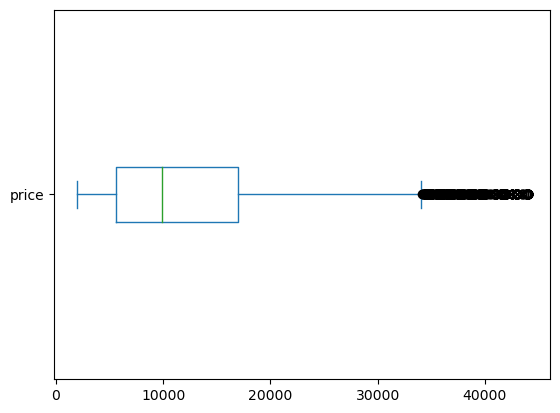

In [59]:
df["price"].plot(kind = "box", vert = False);

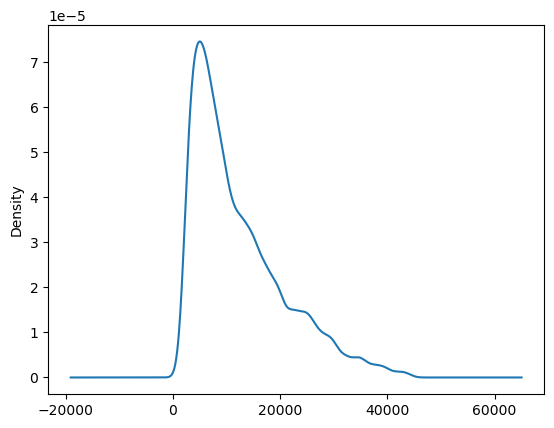

In [64]:
df["price"].plot(kind = "kde");

cylinders
8.0     15033
6.0     14870
4.0     13078
5.0       262
10.0      252
3.0        30
12.0        2
Name: count, dtype: int64

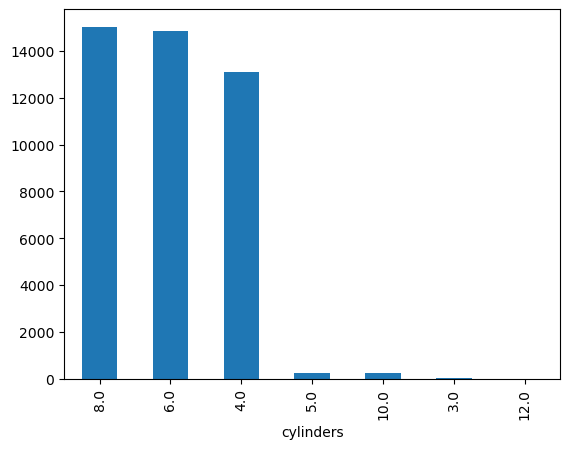

In [70]:
display(df['cylinders'].value_counts())

df['cylinders'].value_counts().plot(kind = "bar");

In [71]:
df.describe(include = "object")

,model,condition,fuel,transmission,type,paint_color
count,48459,48459,48459,48459,48459,39734
unique,100,6,5,3,13,12
top,ford f-150,excellent,gas,automatic,SUV,white
freq,2645,23339,44489,44380,11668,9450


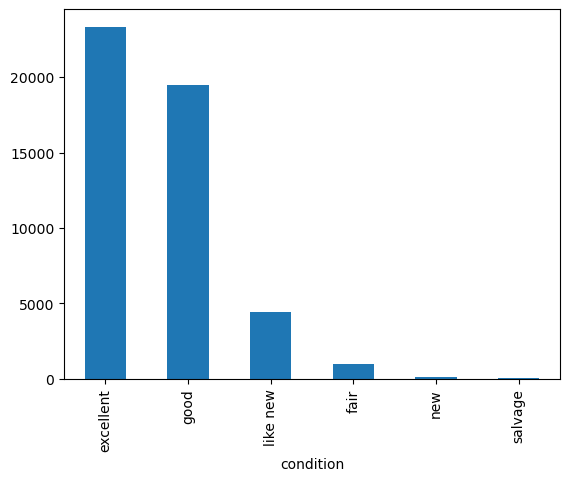

In [74]:
df.condition.value_counts().plot(kind = "bar");

**Bivariate Relationship**

In [78]:
corr = df.corr(numeric_only = True).round(2)

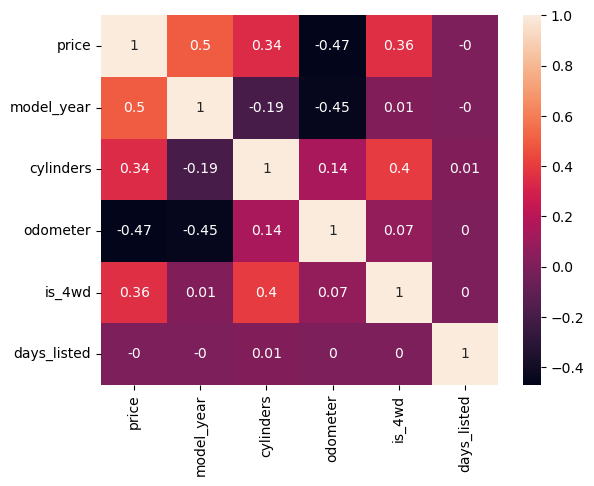

In [82]:
sns.heatmap(corr, annot = True);

In [85]:
corr

,price,model_year,cylinders,odometer,is_4wd,days_listed
price,1.00,0.50,0.34,-0.47,0.36,-0.00
model_year,0.50,1.00,-0.19,-0.45,0.01,-0.00
cylinders,0.34,-0.19,1.00,0.14,0.40,0.01
odometer,-0.47,-0.45,0.14,1.00,0.07,0.00
is_4wd,0.36,0.01,0.40,0.07,1.00,0.00
days_listed,-0.00,-0.00,0.01,0.00,0.00,1.00


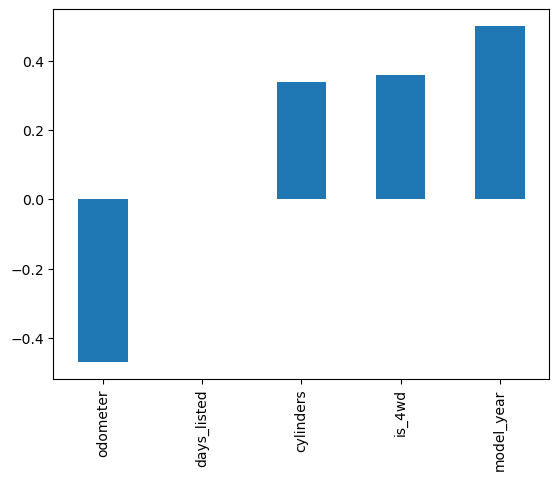

In [95]:
corr["price"].sort_values()[:-1].plot(kind = "bar");

## Categorical 

In [118]:
cat_columns = df.select_dtypes(include = "object").columns.tolist()

In [121]:
df[cat_columns].nunique()

model           100
condition         6
fuel              5
transmission      3
type             13
paint_color      12
dtype: int64

In [97]:
df.sample(5)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
15186,12990,2011.0,ford expedition,excellent,8.0,gas,137686.0,automatic,SUV,white,1.0,2019-01-24,47
17644,18995,2013.0,ford f-250 sd,good,8.0,gas,94236.0,automatic,truck,white,1.0,2018-08-13,139
227,11795,2015.0,toyota tacoma,excellent,4.0,gas,111048.0,automatic,truck,white,0.0,2018-09-30,30
18465,3500,2013.0,volkswagen jetta,fair,4.0,diesel,NaN,automatic,wagon,silver,0.0,2019-04-06,89
42622,10600,2011.0,jeep grand cherokee,like new,8.0,gas,84000.0,automatic,SUV,blue,1.0,2019-04-15,31


In [99]:
df.groupby("condition")["price"].mean()

condition
excellent    13026.235357
fair          4590.168159
good         10924.142696
like new     15995.739452
new          18792.809524
salvage       6745.923077
Name: price, dtype: float64

In [102]:
df.groupby("condition")["price"].agg(["mean", "median", "std"]).round(1)

,mean,median,std
condition,,,
excellent,13026.2,10950.0,8350.1
fair,4590.2,3500.0,3293.4
good,10924.1,7995.0,8047.7
like new,15995.7,13985.0,10076.4
new,18792.8,16499.0,12064.5
salvage,6745.9,5000.0,4935.1


In [112]:
df.groupby("condition")["price"].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
condition,,,,,,,,
excellent,23339.0,13026.24,8350.15,1950.0,6750.0,10950.0,16995.0,44000.0
fair,1005.0,4590.17,3293.38,1950.0,2500.0,3500.0,5500.0,35000.0
good,19489.0,10924.14,8047.74,1950.0,4899.0,7995.0,15300.0,43995.0
like new,4456.0,15995.74,10076.37,1990.0,7500.0,13985.0,22988.0,43999.0
new,105.0,18792.81,12064.53,2400.0,8200.0,16499.0,29900.0,42500.0
salvage,65.0,6745.92,4935.13,2000.0,3000.0,5000.0,8750.0,22000.0


C:\Users\vkoul\Anaconda3\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\vkoul\Anaconda3\lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
C:\Users\vkoul\Anaconda3\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\vkoul\Anaconda3\lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in

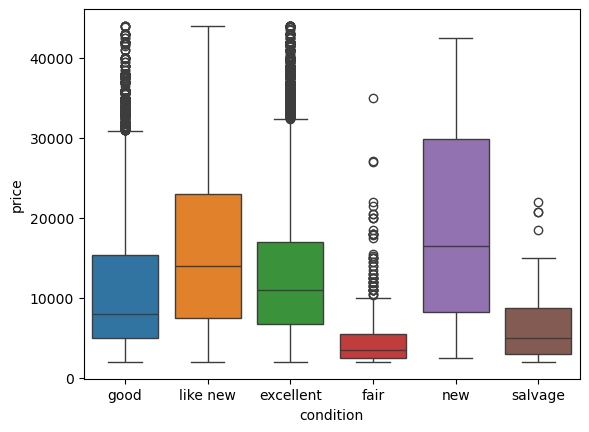

In [105]:
sns.boxplot(data = df, x = "condition", y = "price", hue = "condition");

In [109]:
cat_columns = df.select_dtypes(include = "object").columns.tolist()

C:\Users\vkoul\Anaconda3\lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


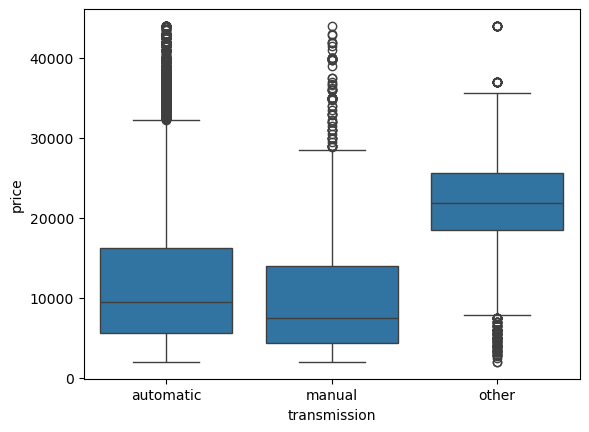

In [114]:
sns.boxplot(data = df, x = "transmission", y = "price");

C:\Users\vkoul\Anaconda3\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\vkoul\Anaconda3\lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
C:\Users\vkoul\Anaconda3\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\vkoul\Anaconda3\lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in

AttributeError: module 'matplotlib.pyplot' has no attribute 'bbox_to_anchor'

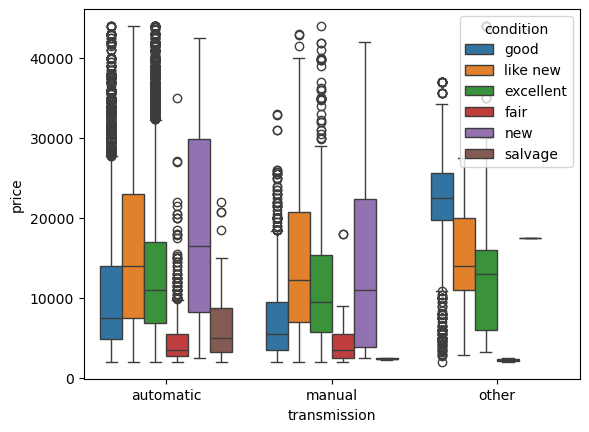

In [117]:
sns.boxplot(data = df, x = "transmission", y = "price", hue = "condition");
plt.bbox_to_anchor(1.3,1.5)